<a href="https://colab.research.google.com/github/trngbro/Puff_Corn/blob/master/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Câu 1 (2.0 điểm): Constraint Satisfaction**

## YC1.1: EightQueenSolver()

Cài đặt lớp đối tượng ***EightQueenSolver*** để giải quyết bài toán 8 quân Hậu bằng thuật toán ***backtracking***.


In [ ]:
class EightQueenSolver:
  # Tạo bảng 8x8 với tất cả các ô có giá trị ban đầu là 0
  def __init__(self):
    self.board = [['.' for x in range(8)] for y in range(8)]


  '''
  Gọi phương thức backtracking để giải quyết bài toán
  Nếu có giải pháp thì in ra màn hình bằng cách sử dụng phương thức printBoard
  Nếu không có giải pháp thì thông báo không tìm thấy giải pháp
  '''
  def solve(self):
    if self.backtracking(0):
      self.printBoard()
    else:
      print("Không tìm thấy giải pháp nào.")

  def backtracking(self, col):
    # Nếu đã duyệt hết 8 cột thì trả về True, báo hiệu tìm thấy giải pháp
    if col == 8:
      return True

    # Duyệt qua tất cả các hàng trong cột hiện tại
    for row in range(8):
      # Kiểm tra xem vị trí đó có thể đặt được quân hậu hay không
      if self.isValid(row, col):
        # Nếu có thể đặt được, đặt quân hậu vào vị trí đó và đệ quy tìm giải pháp cho cột tiếp theo
        self.board[row][col] = 'Q'
        if self.backtracking(col + 1):
          return True
        # Nếu không tìm thấy giải pháp cho cột tiếp theo, quay trở lại vị trí cũ và tiếp tục thử các vị trí khác
        self.board[row][col] = '.'
    # Nếu đã thử tất cả các vị trí trong cột mà không tìm thấy giải pháp, trả về False
    return False

  def isValid(self, row, col):
    # Kiểm tra xem có quân hậu nào trên cùng hàng không
    for i in range(col):
      if self.board[row][i] == 'Q':
        return False

    # Kiểm tra xem có quân hậu nào trên đường chéo trái không
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
      if self.board[i][j] == 'Q':
        return False

    # Kiểm tra xem có quân hậu nào trên đường chéo phải không
    for i, j in zip(range(row, 8, 1), range(col, -1, -1)):
      if self.board[i][j] == 'Q':
        return False
    # nếu không bị xung đột với các quân hậu đã đặt trước đó thì trả về True
    return True  
      

  def printBoard(self):
    for i in range(8):
      for j in range(8):
        print(self.board[i][j], end = " ")
      print() 

**Lớp kiểm thử sử dụng cho EightQueenSolver:**

*   ***B1***: Khởi tạo đối tượng `EightQueenSolver`

*   ***B2***: *(Mở rộng)* Dùng `self.printBoard()` để xem bàn cờ đã khởi tạo

*   ***B3***: Sử dụng self.solve() để xử lý bàn cờ vừa mới khởi tạo

In [ ]:
# Khởi tạo đối tượng EightQueenSolver là solver
solver = EightQueenSolver()
print("Bàn cờ trống 8x8, sau khi khởi tạo:\n")
solver.printBoard()

# Xử lý bàn cờ, sử dụng backtracking (dựa vào thuật toán backtracking ở lesson 05 - Constraint Satisfaction/ trang 16):
print("\n\n\nBàn cờ sau khi xử lý")
solver.solve()

Bàn cờ trống 8x8, sau khi khởi tạo:

. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 



Bàn cờ sau khi xử lý
Q . . . . . . . 
. . . . . . Q . 
. . . . Q . . . 
. . . . . . . Q 
. Q . . . . . . 
. . . Q . . . . 
. . . . . Q . . 
. . Q . . . . . 


## YC1.2: NQueenSolver()

Cài đặt lớp đối tượng ***NQueenSolver*** để giải quyết bài toán n quân Hậu bằng thuật toán ***backtracking*** trong trường hợp tổng quát với N là kích thước của bàn cờ (N dòng, N cột).

In [ ]:
class NQueenSolver:
  def __init__(self, N: int):
    self.N = N
    self.board = [['.' for x in range(N)] for x in range(N)]

  def solve(self) -> None:
    if self.backtracking(0):
      for row in self.board:
        print(' '.join(row))
    else:
      print('UNSOLVABLE')

  def backtracking(self, col: int):
    if col == self.N:
      return True
    for row in range(self.N):
        if self.isValid(row, col):
          self.board[row][col] = 'Q'
          if self.backtracking(col + 1):
            return True
          self.board[row][col] = '.'
    return False

  def isValid(self, row: int, col: int):
    for c in range(col):
      if self.board[row][c] == 'Q':
        return False

    for r, c in zip(range(row, -1, -1), range(col, -1, -1)):
      if self.board[r][c] == 'Q':
        return False

    for r, c in zip(range(row, self.N), range(col, -1, -1)):
      if self.board[r][c] == 'Q':
        return False

    return True
  def printBoard(self):
    for i in range(self.N):
      for j in range(self.N):
        print(self.board[i][j], end = " ")
      print() 

**Lớp kiểm thử sử dụng cho NQueenSolver:**

*   ***B1***: Khởi tạo đối tượng `NQueenSolver`

*   ***B2***: *(Mở rộng)* Dùng `self.printBoard()` để xem bàn cờ đã khởi tạo

*   ***B3***: Sử dụng self.solve() để xử lý bàn cờ vừa mới khởi tạo

In [ ]:
# Khởi tạo đối tượng NQueenSolver là solver
solver = NQueenSolver(24)
print("Bàn cờ trống NxN, sau khi khởi tạo:")
solver.printBoard()

# Xử lý bàn cờ, sử dụng backtracking (dựa vào thuật toán backtracking ở lesson 05 - Constraint Satisfaction/ trang 16):
print("\n\n\nBàn cờ sau khi xử lý")
solver.solve()

Bàn cờ trống NxN, sau khi khởi tạo:
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . .

# Câu 2 (2.0 điểm): Adversarial Search

Chạy đoạn mã dưới đây, ngay sau khi xuất hiện **Choose Files** thì lập tức bấm vào và chọn file txt input để chạy thuật toán. Sau quá trình tải lên *(đạt 100% trạng thái)* thì sẽ xuất ra màn hình thông tin file tải lên. Kiểm tra và chắc chắn là tải lên đúng file.

Cũng có thể kiểm tra rằng file đã tải lên hay chưa bằng cách kiểm tra có file minimax.txt tồn tại ở folder colab hay chưa (hình minh hoạ đính kèm).





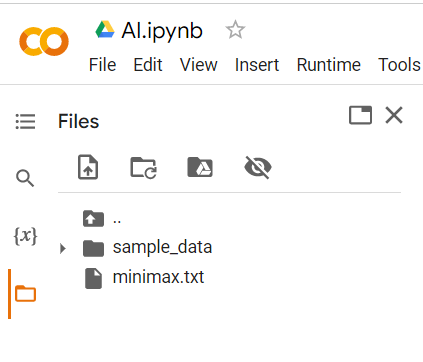



In [ ]:
import os.path
from google.colab import files

if not (os.path.isfile("minimax.txt")):
  uploaded = files.upload()
  file_name = "minimax.txt"
with open('minimax.txt', 'r') as f:
  data = f.readlines()
  print("Các dòng đầu của file:")
  for line in data[:8]:
      print(line)

Các dòng đầu của file:
19 8

n1 n2

n1 n3

n1 n4

n2 n5

n2 n6

n3 n7

n3 n8



## YC2.1 Cài đặt hai lớp theo mô tả


Phương thức **`print_tree`** được sử dụng để in cây Minimax theo định dạng bắt đầu từ nút gốc và tiếp tục xuống các nút con theo độ sâu của cây.


Phương thức **`read`** được sử dụng để đọc tệp đầu vào chứa các nút và kết nối giữa chúng. Đầu tiên, nó đọc số lượng cặp nút và kết nối từ tệp đầu vào và tạo các nút tương ứng cho chúng. Sau đó, nó đọc các nút cuối cùng và giá trị tương ứng của chúng. Cuối cùng, nó thiết lập nút gốc, tập các nút cuối cùng và giá trị tương ứng và danh sách kế tiếp của mỗi nút.


Phương thức **`minimax`** là thuật toán Minimax, nó thực hiện tính toán Minimax Decision của một nút. Nếu nút đó là nút cuối cùng, giá trị của nó sẽ được trả về. Nếu nút là nút max, giá trị lớn nhất của các nút con sẽ được chọn. Nếu nút là nút min, giá trị nhỏ nhất của các nút con sẽ được chọn.


Phương thức **`run`** sử dụng thuật toán Minimax để tính toán Minimax Decision cho mỗi nút trong cây và trả về một từ điển kết quả, với các khóa là các identifier của các nút và các giá trị tương ứng là Minimax Decision của các nút đó.

In [ ]:
class Node:
    def __init__(self, identifier, value=None):
        self.identifier = identifier  
        self.value = value
        self.successors = []    # Danh sách các Node kế tiếp

    def __str__(self):
        return f"({self.identifier}, {self.value})"

class MinimaxDecision:
    def __init__(self, root=None, terminalStates=None, successors=None):
        self.root = root
        self.terminalStates = terminalStates
        self.successors = successors

    def print_tree(self, node, level=0):
        print("\t" * level, node)
        for succ in node.successors:
            self.print_tree(succ, level+1)

    # Đọc từng cặp node và node kế tiếp và tạo các node
    def read(self, filename):
        with open(filename, "r") as f:
            e, l = map(int, f.readline().split())
            nodes_dict = {}
            for i in range(e):
                a, b = f.readline().split()
                if a not in nodes_dict:
                    nodes_dict[a] = Node(a)
                if b not in nodes_dict:
                    nodes_dict[b] = Node(b)
                nodes_dict[a].successors.append(nodes_dict[b])
            # Đọc terminal node và giá trị tương ứng
            for i in range(l):
                node, value = f.readline().split()
                nodes_dict[node].value = int(value)
        self.root = nodes_dict["n00"]   # Thiết lập node gốc
        self.terminalStates = {n.identifier: n.value for n in nodes_dict.values() if not n.successors}
        self.successors = {n: n.successors for n in nodes_dict.values()}

    def minimax(self, node, maximizingPlayer):
        # Nếu đang là terminal node thì trả về nó
        if node.identifier in self.terminalStates:
            return self.terminalStates[node.identifier]
        # Nếu node là node max, chọn giá trị lớn nhất của các node con
        elif maximizingPlayer:
            maxEval = float('-inf')
            for child in self.successors[node]:
                eval = self.minimax(child, False)
                maxEval = max(maxEval, eval)
            return maxEval
        # Nếu node là node min, chọn giá trị nhỏ nhất của các node con
        else:
            minEval = float('inf')
            for child in self.successors[node]:
                eval = self.minimax(child, True)
                minEval = min(minEval, eval)
            return minEval

    def run(self):
        result = {}
        for node in self.successors:
            result[node.identifier] = self.minimax(node, False)
        return result


**Lớp kiểm thử sử dụng cho MinimaxDecision:**

*   ***B1***: Khởi tạo đối tượng `MinimaxDecision`

*   ***B2***: Dùng `self.read(*/truyền vào đường dẫn/*)` để đọc input

*   ***B3***: Sử dụng self.run() để chạy giải thuật Minimax Decision

*   ***B3***: Sử dụng self.print_tree() để vẽ cây

## YC2.2 Cài đặt hàm print()


In [ ]:
# Tạo đối tượng MinimaxDecision
decision = MinimaxDecision()

# Dùng self.read(file) để đọc dữ liệu từ file lên cho đối tượng vừa khởi tạo
decision.read("minimax.txt")

# In cây
decision.print_tree(decision.root)

 (n00, None)
	 (n10, None)
		 (n20, None)
			 (n30, None)
				 (n41, 4)
				 (n42, 3)
				 (n43, 5)
			 (n31, None)
				 (n44, 2)
				 (n45, 1)
		 (n21, None)
			 (n32, None)
				 (n46, 4)
				 (n47, 2)
				 (n48, 3)
		 (n22, None)
			 (n33, None)
				 (n49, 5)
				 (n410, 4)
			 (n34, None)
				 (n411, 7)
			 (n35, None)
				 (n412, 3)
				 (n413, 2)
	 (n11, None)
		 (n23, None)
			 (n36, None)
				 (n414, 1)
				 (n415, 4)
				 (n416, 0)
		 (n24, None)
			 (n37, None)
				 (n417, 5)
				 (n418, 3)
			 (n38, None)
				 (n419, 0)
		 (n25, None)
			 (n39, None)
				 (n420, 2)
				 (n421, 7)
				 (n422, 4)
			 (n310, None)
				 (n423, 3)
				 (n424, 6)
			 (n311, None)
				 (n425, 5)
				 (n426, 3)
				 (n427, 1)


## YC2.1 Cài đặt hàm run()


In [ ]:
import json

# Tạo đối tượng MinimaxDecision
decision = MinimaxDecision()

# Dùng self.read(file) để đọc dữ liệu từ file lên cho đối tượng vừa khởi tạo
decision.read("minimax.txt")

# Dùng self.run() để thực hiện thuật toán Minimax Decision
result = decision.run()

# Dùng thêm JSON để hiển thị kết quả được đẹp hơn có thể thay thế bằng print(result)
print("Kết quả thực hiện thuật toán:")
print(json.dumps(result, sort_keys=False, indent=4))

# Nếu muốn truy xuất vào một kết quả cụ thể thì cập nhật giá trị biến dưới đây
NODE_ID_MINIMACDECISION = "n00"
print("\n\n\n\nXem chi tiết:")
print("MinimaxDecision cho", NODE_ID_MINIMACDECISION, "là" , result[NODE_ID_MINIMACDECISION])


Kết quả thực hiện thuật toán:
{
    "n00": 4,
    "n10": 2,
    "n11": 0,
    "n20": 2,
    "n21": 4,
    "n22": 3,
    "n23": 4,
    "n24": 0,
    "n25": 5,
    "n30": 3,
    "n31": 1,
    "n32": 2,
    "n33": 4,
    "n34": 7,
    "n35": 2,
    "n36": 0,
    "n37": 3,
    "n38": 0,
    "n39": 2,
    "n310": 3,
    "n311": 1,
    "n41": 4,
    "n42": 3,
    "n43": 5,
    "n44": 2,
    "n45": 1,
    "n46": 4,
    "n47": 2,
    "n48": 3,
    "n49": 5,
    "n410": 4,
    "n411": 7,
    "n412": 3,
    "n413": 2,
    "n414": 1,
    "n415": 4,
    "n416": 0,
    "n417": 5,
    "n418": 3,
    "n419": 0,
    "n420": 2,
    "n421": 7,
    "n422": 4,
    "n423": 3,
    "n424": 6,
    "n425": 5,
    "n426": 3,
    "n427": 1
}




Xem chi tiết:
MinimaxDecision cho n00 là 4


# Câu 3 (2.0 điểm): Logical Agents